In [73]:
"""
cluster.py
"""
from collections import Counter, defaultdict, deque
import copy
import math
import matplotlib.pyplot as plt
import networkx as nx
import urllib.request
import pickle
import os

# Read the friends file previously loaded
def read_friends():
    return pickle.load(open('nmodi_frnds.pkl', 'rb'))

# Count the number of friends read
def count_friends(users):
    counts = Counter()
    for user in users:
        counts.update(user['friends'])
    return counts

# Create a networkx graph of Narendra Modi
def create_graph(users, friend_counts):
    graph = nx.Graph()
    parent_node='NarendraModi'
    graph.add_node(parent_node)
    for user in users:
        graph.add_edge(parent_node, user["screen_name"])
    for user in users:
        graph.add_node(user["screen_name"])
        for friends in user["friends"]:
            if friend_counts[friends] > 1:
                graph.add_node(friends)
                graph.add_edge((friends), user["screen_name"])
    return graph

# Draw the graph
def draw_network(graph, users, filename):
    labels = {}
    parent_node = 'NarendraModi'
    for node in graph.nodes():
        if node==parent_node:
            labels[node] = node
        for user in users:
            if node == user["screen_name"]:
                labels[node] = node

    plt.figure(figsize=(15, 15))
    nx.draw_networkx(graph, node_color='#FF9933',node_size=250,edge_color='#CCCCCC',font_size=15, labels=labels)
    plt.savefig(filename)
    
# Find communities in the graph using the Girvan Newmann algorithm
def girvan_newman(G, most_valuable_edge=None):
    """
    Purpose
    -------
    Find communities in a graph using the Girvan–Newman method.

    Summary
    -----
    The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. 
    The algorithm removes the "most valuable" edge, traditionally the edge with the highest betweennes at each step. 
    As the graph breaks down into subgraphs, the tightly knit community structure is exposed and the result can be depicted 
    as a dendrogram.

    """
    # If the graph is empty, return its connected components
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    
    # If no function is provided for computing the most valuable edge, use the edge betweenness
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.
            """
            # We have guaranteed that the graph is non-empty, so this dictionary will never be empty
            
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
    
    # The copy of G here must include the edge weights
    # Self-loops must be removed because & their removal has no effect on the connected components of the graph
    
    G.remove_edges_from(G.selfloop_edges())
    while G.number_of_edges() > 0:
        yield without_most_central_edges(G, most_valuable_edge)

def without_most_central_edges(G, most_valuable_edge):
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    while num_new_components <= original_num_components+29:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

<IPython.core.display.Javascript object>


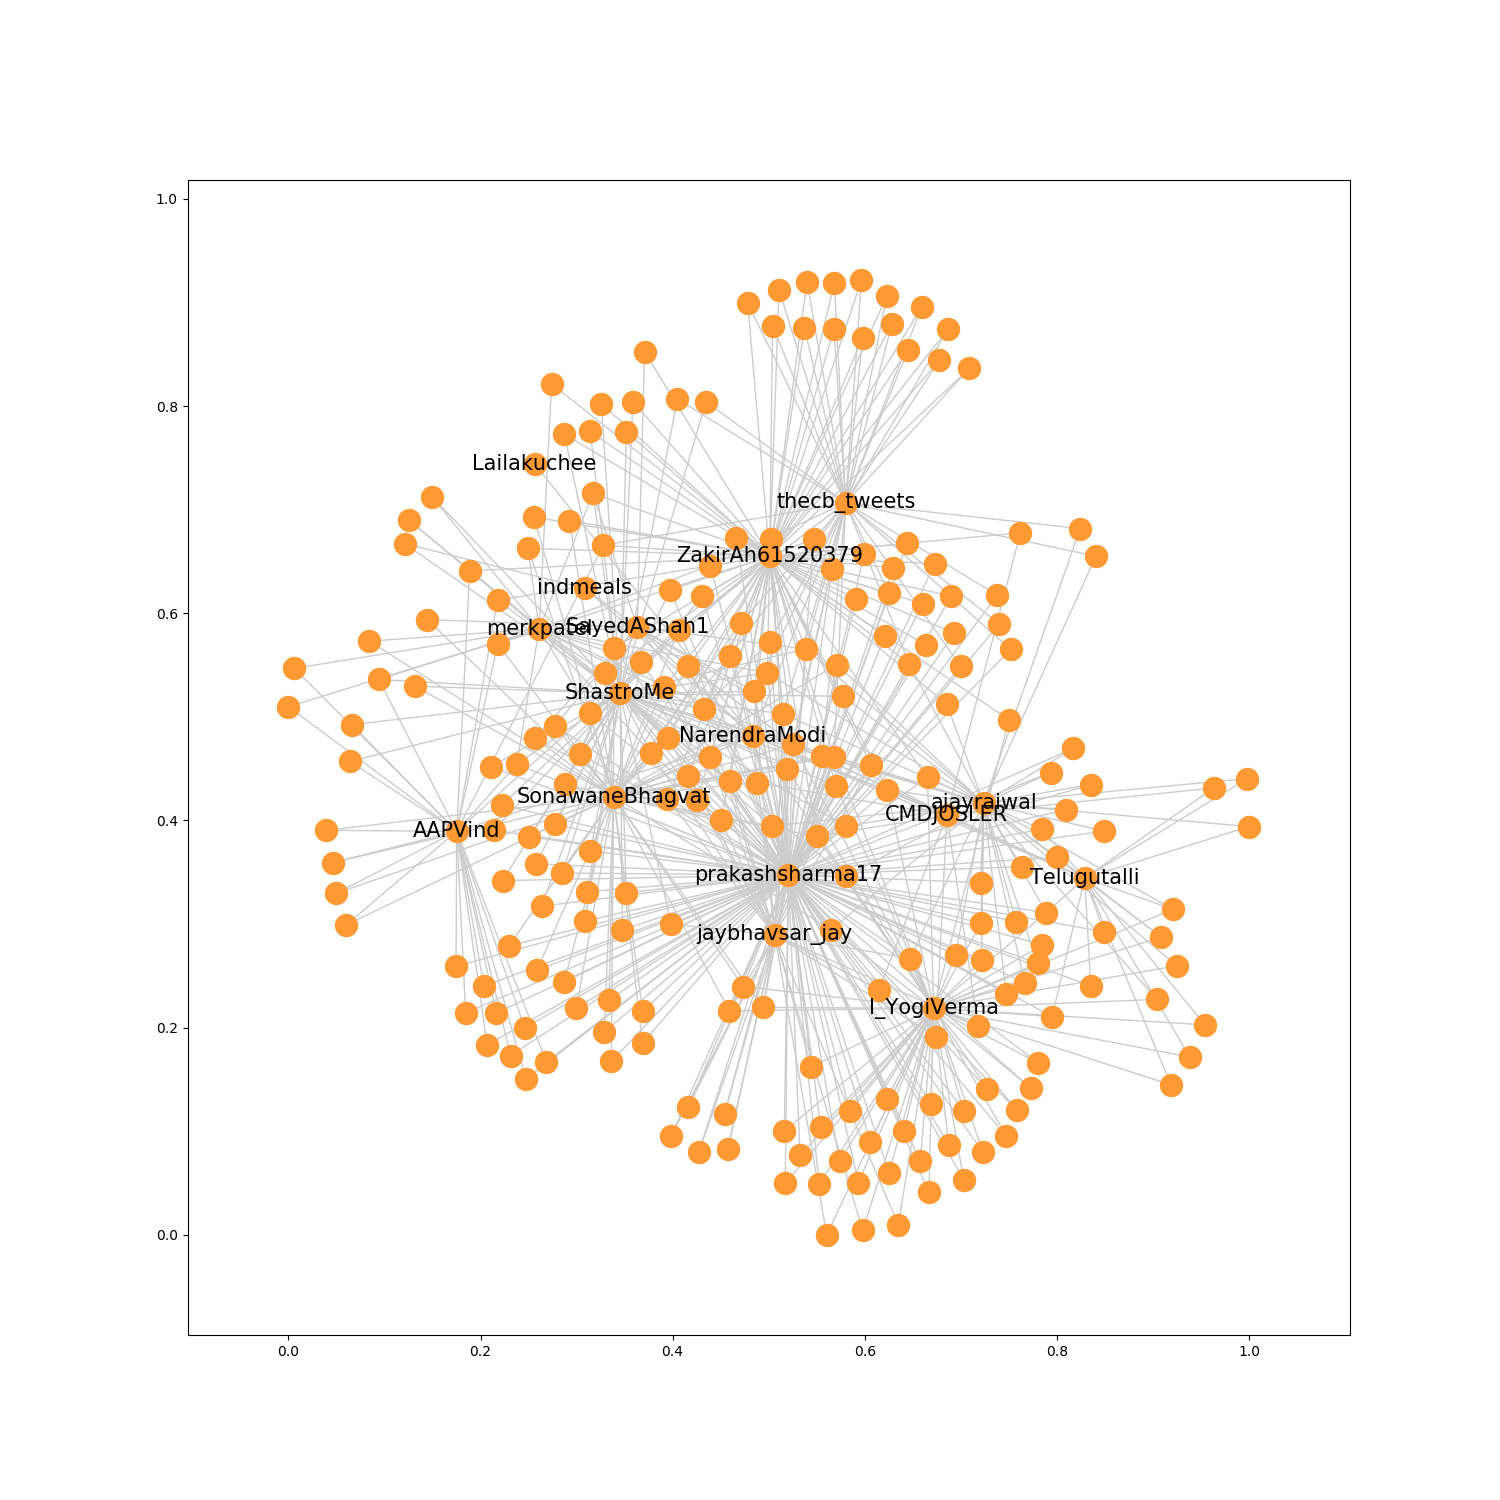

<IPython.core.display.Javascript object>


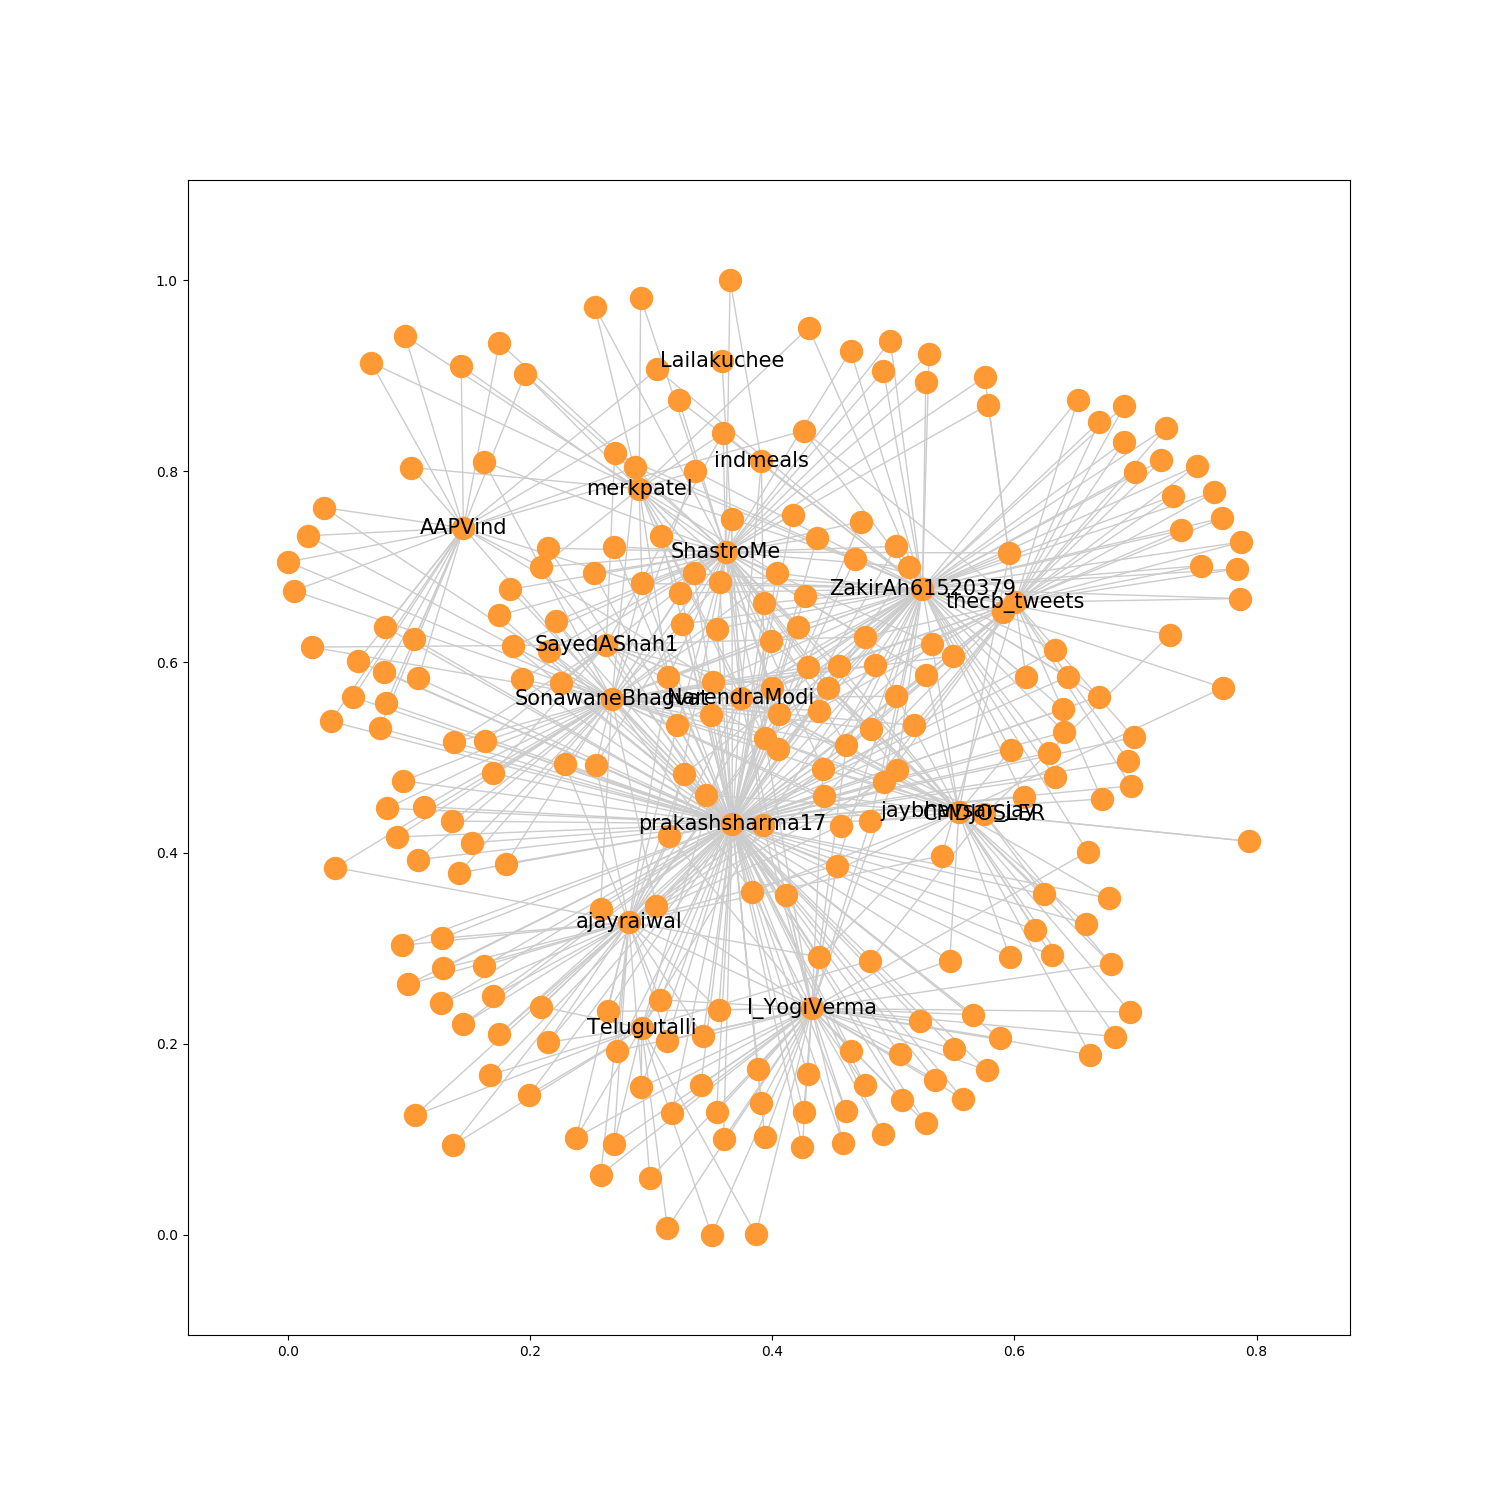

Starting to discover communities (the algorithm will continue untill it discovers a minimum of 30 communities!
({751607988142665728, 822215679726100480, 830360126347309056, 23592970, 'CMDJOSLER', 267187224, 41364508, 44635677, 1490999844, 32843303, 157903916, 366947884, 309824558, 1536791610, 42606652, 347035710, 627355202, 321866313, 240649814, 355874903, 3171712086, 57928790, 56312411, 30417501, 99448420, 37168231, 'thecb_tweets', 134758540, 57998991, 1346439824, 'jaybhavsar_jay', 'NarendraModi', 141633175, 137780376, 1288175774, 1492538024, 1243173036, 373280952, 'merkpatel', 132385468, 56042688, 361315016, 121044171, 75509967, 25073877, 88856792, 68977380, 2574072036, 813286, 18839785, 130104041, 2526794479, 139876086, 1330457336, 2541363451, 171355391, 'ShastroMe', 207809313, 19929890, 135421739, 471741741, 358814014, 2251588934, 77732185, 405427035, 264034657, 2183816041, 'SonawaneBhagvat', 371730289, 189917061, 613321095, 101311381, 97217966, 'SayedAShah1', 44588485, 92724677, 7

<IPython.core.display.Javascript object>


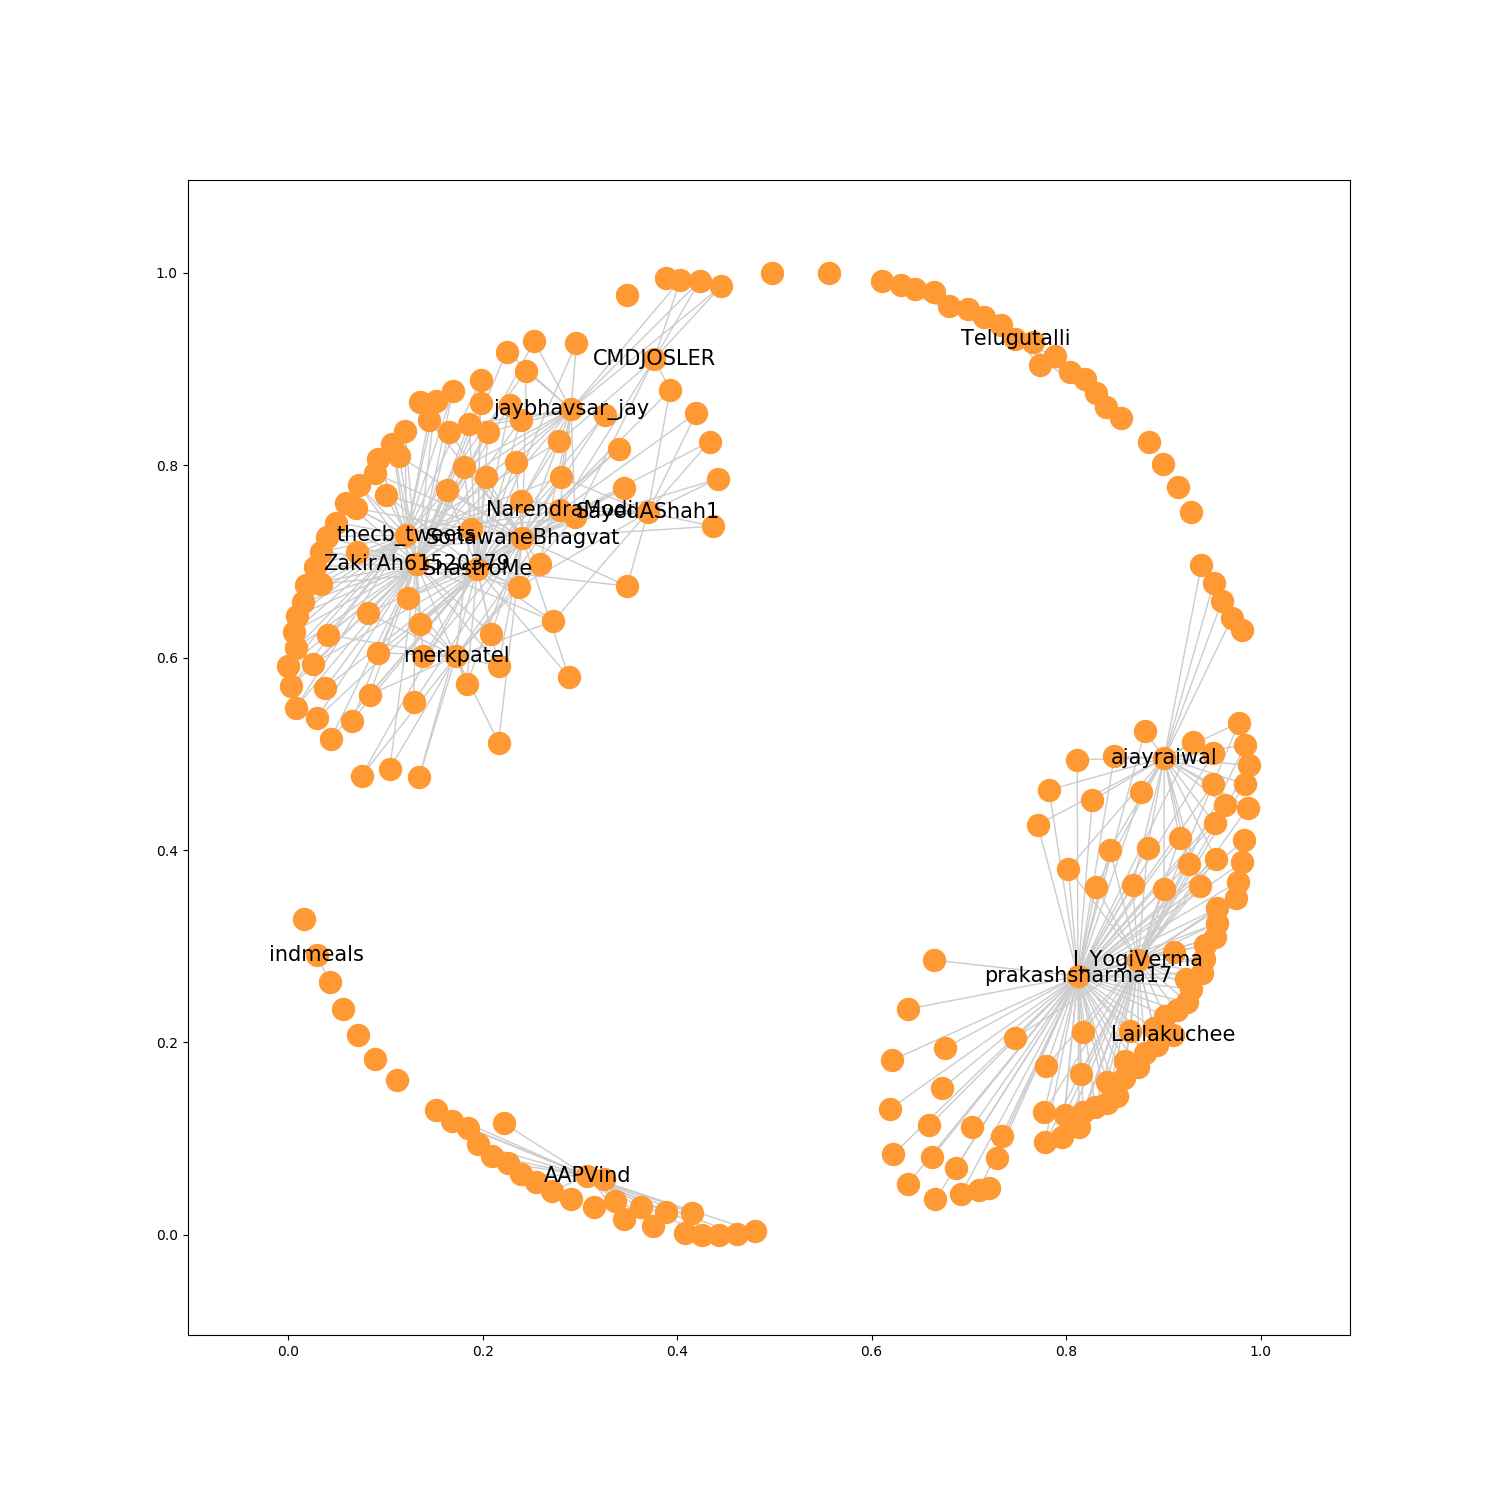

In [74]:
def main():
    
    # Read the friends file loaded earlier
    users = read_friends()
    
     # Count the number of friends
    friend_counts = count_friends(users)
    
    # Create a graph of the network & draw the network
    graph = create_graph(users, friend_counts)
    parent_node = 'NarendraModi'
    draw_network(graph,users, 'Original_Network.png')
    
    # Create a copy of the graph before perfoming subsequent operations
    Gcopy = graph.copy()
                
    # Draw the reduced network
    draw_network(Gcopy,users, 'Reduced_Network.png')
    
    # Stopping condition for community discovering
    print("Starting to discover communities (the algorithm will continue untill it discovers a minimum of 30 communities!")
          
    # Perform partition of the graph using Girvann Newmann algorithm
    partition = girvan_newman(Gcopy)
    clusters = (tuple((c) for c in next(partition)))
    print(clusters)
    
    # Save the result to a file
    file = open("Clusters.txt", "w")
    file.write('\nNumber of communities discovered: %d' % len(clusters))
    
    # Calculate summary statistics
    npeople=0
    for i in range(len(clusters)):
        npeople+=len(clusters[i])
    
    # Save the result to a file
    file.write('\nAverage number of people across all communities: ' + str(npeople/len(clusters)))
    file.close()
    
    # Draw the final clustered network
    draw_network(Gcopy,users, 'Detected_Communities.png')
    
if __name__=='__main__':
    main()

In [2]:
"""
cluster.py
"""
# The program creates a graph of the network of PM Narendra Modi and performs clustering using GIrvan-Newmann algorithm

# Time taken: 2-3 minutes

# Loading required libraries
from collections import Counter, defaultdict, deque
import copy
import math
import matplotlib.pyplot as plt
import networkx as nx
import urllib.request
import pickle

# Read the friends file previously loaded
def read_friends():
    return pickle.load(open('nmodi_frnds.pkl', 'rb'))

# Count the number of friends read
def count_friends(users):
    counts = Counter()
    for user in users:
        counts.update(user['friends'])
    return counts

# Create a networkx graph of Narendra Modi
def create_graph(users, friend_counts):
    graph = nx.Graph()
    parent_node='NarendraModi'
    graph.add_node(parent_node)
    for user in users:
        graph.add_edge(parent_node, user["screen_name"])
    for user in users:
        graph.add_node(user["screen_name"])
        for friends in user["friends"]:
            if friend_counts[friends] > 1:
                graph.add_node(friends)
                graph.add_edge((friends), user["screen_name"])
    return graph

# Draw the graph
def draw_network(graph, users, filename):
    labels = {}
    parent_node = 'NarendraModi'
    for node in graph.nodes():
        if node==parent_node:
            labels[node] = node
        for user in users:
            if node == user["screen_name"]:
                labels[node] = node

    plt.figure(figsize=(15, 15))
    nx.draw_networkx(graph, node_color='#FF9933',node_size=250,edge_color='#CCCCCC',font_size=15, labels=labels)
    plt.savefig(filename)

# Compute Jaccard scores to remove dissimilar nodes
def jaccard(graph, node):
    jaccard_scores = []
    neighbors = set(graph.neighbors(node))
    for n in graph.nodes():
        if node!=n and not graph.has_edge(node, n):
            neighbors2 = set(graph.neighbors(n))
            jaccard_scores.append(((node, n), len(neighbors & neighbors2) / len(neighbors | neighbors2)))
    return sorted(jaccard_scores, key=lambda x: (-x[1],x[0]))
    
# Find communities in the graph using the Girvan Newmann algorithm
def girvan_newman(G, most_valuable_edge=None):
    """
    Purpose
    -------
    Find communities in a graph using the Girvan–Newman method.

    Summary
    -----
    The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. 
    The algorithm removes the "most valuable" edge, traditionally the edge with the highest betweennes at each step. 
    As the graph breaks down into subgraphs, the tightly knit community structure is exposed and the result can be depicted 
    as a dendrogram.

    """
    # If the graph is empty, return its connected components
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    
    # If no function is provided for computing the most valuable edge, use the edge betweenness
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.
            """
            # We have guaranteed that the graph is non-empty, so this dictionary will never be empty
            
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
    
    # The copy of G here must include the edge weights
    # Self-loops must be removed because & their removal has no effect on the connected components of the graph
    
    G.remove_edges_from(G.selfloop_edges())
    while G.number_of_edges() > 0:
        yield without_most_central_edges(G, most_valuable_edge)

def without_most_central_edges(G, most_valuable_edge):
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    while num_new_components < original_num_components+19:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

def main():
    
    # Read the friends file loaded earlier
    users = read_friends()
    
     # Count the number of friends
    friend_counts = count_friends(users)
    
    # Create a graph of the network & draw the network
    graph = create_graph(users, friend_counts)
    parent_node = 'NarendraModi'
    draw_network(graph,users, 'Original_Network.png')
    
    # Create a copy of the graph before perfoming subsequent operations
    Gcopy = graph.copy()
    
    # Use Jaccard scores to remove dissimilar nodes
    jaccard_scores = jaccard(Gcopy, parent_node)
    for (node,n), scores in jaccard_scores:
        if scores < 0.1:
            Gcopy.remove_node(n)
                
    # Draw the reduced network
    draw_network(Gcopy,users, 'Reduced_Network.png')
    
    # Stopping condition for community discovering
    print("Starting to discover communities (the algorithm will continue untill it discovers a minimum of 20 communities)")
          
    # Perform partition of the graph using Girvann Newmann algorithm
    partition = girvan_newman(Gcopy)
    clusters = (tuple((c) for c in next(partition)))
    
    # Save the result to a file
    file = open("Clustering Summary.txt", "w",encoding='utf8')
    file.write('\nNumber of communities discovered: %d' % len(clusters))
   
   # Calculate summary statistics
    npeople=0
    for i in range(len(clusters)):
        npeople+=len(clusters[i])
    
    # Save the result to a file
    file.write('\nAverage number of people across all communities: ' + str(npeople/len(clusters)))
    file.close()
    
    # Draw the final clustered network
    draw_network(Gcopy,users, 'Detected_Communities.png')
    
if __name__=='__main__':
    main()

Starting to discover communities (the algorithm will continue untill it discovers a minimum of 30 communities)
